<a href="https://colab.research.google.com/github/aayushme/Aayush_AI_Squad_Project1/blob/master/Musical_Instrumets_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Kaggle Database***

**Calling Required Libraries**

In [ ]:
import os
import pandas as pd

**Importing Kaggle.json**

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle (1).json


**Kaggle Cred**


In [ ]:
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

**Downloading Database**

In [ ]:
!kaggle datasets download -d aayushme/music-instruments-classification

music-instruments-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip "*.zip"

In [ ]:
os.listdir("instruments_data")

['piano',
 'drums',
 'saxophone',
 'acoustic_guitar',
 'flute',
 'violen',
 'harp',
 'tabla',
 'bass_guitar',
 'gramophone']

#**Data Augmentation**

**Importing Libraries**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

**Callling Transform Function and creating data class**

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("instruments_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())
data.classes

['acoustic_guitar',
 'bass_guitar',
 'drums',
 'flute',
 'gramophone',
 'harp',
 'piano',
 'saxophone',
 'tabla',
 'violen']

**Counting Number of images before Augmentation**

In [ ]:
total = 0
for c in enumerate(data.classes):
    images = os.listdir("instruments_data/"+str(c[1]))
    print(c[1])
    total = total+len(images)
    print(len(images) )

print("Total Images")
print(total)

acoustic_guitar
1904
bass_guitar
1274
drums
1509
flute
750
gramophone
1832
harp
1995
piano
1091
saxophone
1742
tabla
1672
violen
1654
Total Images
15423


**
**

**Dihedral Function**

In [ ]:
def apply_dihedral(image, folder, name):
  img_counter = folder + '/' + 'dihedral' + str(name.split('.')[0])
  idx = 0
  for i in range(1,5,3):
    new_img = dihedral(image, i)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1



**Brightness Function**

In [ ]:
def change_brightness(image, folder, name):
  img_counter = folder + '/' + 'brightness' + str(name.split('.')[0])
  idx = 0
  for change in np.linspace(0.2,0.8,2):
    new_img = brightness(image, change)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1

**Calling the Dihedral and Brightness Functions**

In [ ]:

for c in enumerate(data.classes):
  images = os.listdir("instruments_data/"+str(c[1]))

  for img in images:
    
    #Try and catch statments for error detection

    try:
      change_brightness(open_image("instruments_data/"+str(c[1])+"/"+img),"instruments_data/"+str(c[1]) , img)
      print("Done Brighntess Changes")

    except:
      print("Not Done Brightness Changes")

    try:
      apply_dihedral(open_image("instruments_data/"+str(c[1])+"/"+img),"instruments_data/"+str(c[1]) , img)
      print("Done Dihedral Changes")

    except:
      print("Not Done Dihedral Changes")


**Counting Images After Augmentation**

In [ ]:
total = 0
for c in enumerate(data.classes):
    images = os.listdir("instruments_data/"+str(c[1]))
    print(c[1])
    total = total+len(images)
    print(len(images) )

print("Total Images")
print(total)

#**Training Model**

**Calling Resnet50 into learn variable**

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


**Training the data**

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.279065,0.089429,0.972114,02:33
1,0.153712,0.035308,0.986381,02:35
2,0.079194,0.021601,0.991894,02:34
3,0.053387,0.016772,0.995136,02:34


**Plotting The Learning Rate**

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


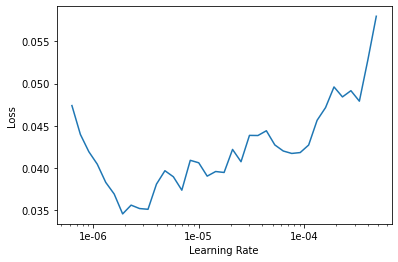

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Making Directory in drive and saving path in `my_dir` variable**

In [ ]:
os.makedirs('/content/drive/My Drive/Aayush_Project/Music_Instruments') 

In [ ]:
my_dir="/content/drive/My Drive/Aayush_Project/Music_Instruments"

**Saving The state with name `Stage-1`**

In [ ]:
learn.save(my_dir+"/Stage-1")

**Export stage-1 to drive**

In [ ]:
learn.export(my_dir+"/export.pkl")

In [ ]:
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(model.state_dict(), path)